<a href="https://colab.research.google.com/github/seymatttass/MachineLearningExamples/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor ,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
hit = pd.read_csv("/content/drive/MyDrive/Ornek_calısmalar/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis =1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
# SVR - DESTEK VEKTÖR REGRESYONU

X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [ ]:
from sklearn.svm import SVR


svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [ ]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [ ]:
print("y = {0} + {1} x".format(svr_model.intercept_[0],svr_model.coef_[0][0]))   #sabit ve beta 1 katssayısı

y = -48.69756097561513 + 4.969512195122093 x


In [ ]:
X_train["Hits"][0:1]

,Hits
183,91.0


In [ ]:
-48.69756097561513 + 4.969512195122093*91     # Denklemi doğruladık.

403.5280487804953

In [ ]:
y_pred = svr_model.predict(X_train)

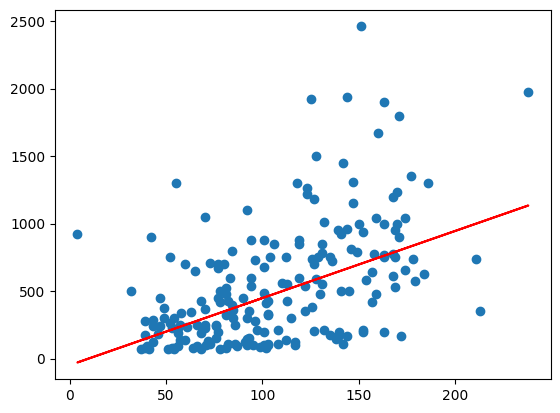

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred,color="red")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train,y_train)
lm_pred = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_,lm_model.coef_))

y = -8.814095480334345 + [5.17245614] x


In [ ]:
-8.814095480334345 + 5.17245614*91    #Lineer regresyon modeli bu sonucu verdi.

461.8794132596657

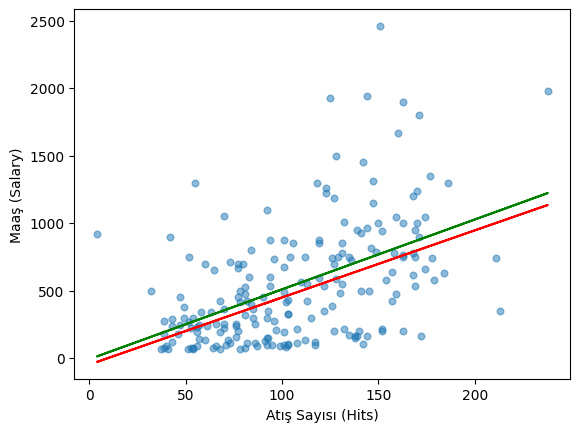

In [ ]:
plt.scatter(X_train,y_train,alpha = 0.5,s=23)
plt.plot(X_train,lm_pred,color="g")
plt.plot(X_train,y_pred,color = 'r')

plt.xlabel("Atış Sayısı (Hits)")
plt.ylabel("Maaş (Salary)")

# svr daha altta çünkü robasttır(dayanıklı),grafikte üstte olan noktalar svr ı  yukarı çekemedi.Ancak linner modeli çekti.çünkü robast değil.

plt.show()

In [ ]:
# TAHMİN

print("y = {0} + {1} x".format(svr_model.intercept_[0],svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [ ]:
svr_model.predict([[91]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([403.52804878])

In [ ]:
y_pred = svr_model.predict(X_test)    # tahmin değerleri

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))


459.0187960365147

In [ ]:
# MODEL TUNİNG

svr_model

SVR(kernel='linear')

In [ ]:
svr_params = {"C":np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=10).fit(X_train,y_train)

In [ ]:
svr_cv_model.best_params_

{'C': 0.1}

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

<ipython-input-34-1316d66713aa>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd.Series(svr_cv_model.best_params_)[0]


0.1

In [ ]:
svr_tuned = SVR(kernel="linear", C=svr_cv_model.best_params_["C"]).fit(X_train, y_train)


In [ ]:
y_pred = svr_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

458.198966781116

In [ ]:
# DOĞRUSAL OLMAYAN SVR  , Suni veri seti oluşturduk.

np.random.seed(3)

x_sim = np.random.uniform(2,10,145)
y_sim = np.sin(x_sim) + np.random.normal(0,0.4,145)

x_outliers = np.arange(2.5,5,0.5)   #aykırı gözlem ekleyelim.
y_outliers = -5*np.ones(5)                  #aykırı gözlem ekleyelim.

x_sim = np.concatenate((x_sim,x_outliers))
y_sim = np.concatenate((y_sim,y_outliers))

x_sim_idx = np.argsort(np.concatenate([x_sim,x_outliers]))
x_sim = np.concatenate([x_sim,x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim,y_outliers])[x_sim_idx]

In [ ]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(np.sin(x_sim[:,np.newaxis]),y_sim)
ols_pred = ols.predict(np.sin(x_sim[:,np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel='rbf', epsilon=eps)  # kernel anahtar kelime olarak belirtildi
svr.fit(x_sim[:, np.newaxis], y_sim)  # fit fonksiyonuna doğru argümanlar verildi
svr_pred = svr.predict(x_sim[:, np.newaxis])

# rbf doğrusal olmayan bir formdur.

<ipython-input-48-820f152a7a16>:7: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([plt_ols,plt_svr],['EKK','SVR'],loc=4)


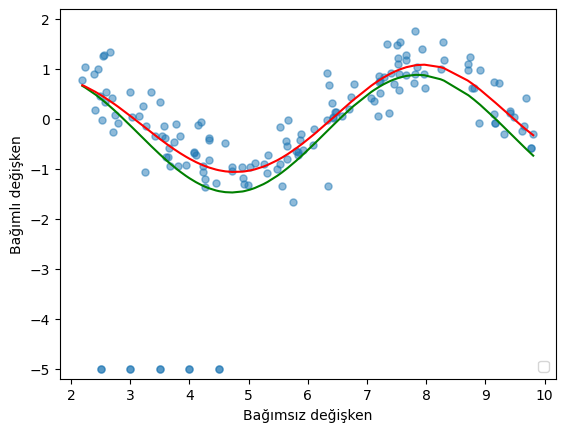

In [ ]:
plt.scatter(x_sim,y_sim,alpha=0.5,s = 26)
plt_ols = plt.plot(x_sim,ols_pred,'g')
plt_svr = plt.plot(x_sim,svr_pred,'r')
plt.xlabel("Bağımsız değişken")
plt.ylabel("Bağımlı değişken")
plt.ylim(-5.2,2.2)
plt.legend([plt_ols,plt_svr],['EKK','SVR'],loc=4)
plt.show()

In [ ]:
hit = pd.read_csv("/content/drive/MyDrive/Ornek_calısmalar/Hitters.csv")
df = hit.copy()
df=df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary","League" ,"Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N" ]]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)


In [ ]:
# TAHMİN

y_pred = svr_rbf.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

462.64750060465025

In [ ]:
# MODEL TUNİNG

svr_rbf

SVR()

In [ ]:
svr_params = {"C":[0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params,cv=10).fit(X_train,y_train)

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]    #en iyi parametre değerini alalım

<ipython-input-57-a2ff7de7dd84>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd.Series(svr_cv_model.best_params_)[0]    #en iyi parametre değerini alalım


30

In [ ]:
svr_tuned = SVR(kernel="rbf",C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

<ipython-input-60-36cb9977a744>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  svr_tuned = SVR(kernel="rbf",C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)


In [ ]:
y_pred = svr_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

437.0725328419696